In [1]:
import pandas as pd
import csv
import acquire
import prepare
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
df = acquire.merge_dataframes()

In [3]:
df.head()

,date,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
1,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566
2,2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752"
3,2018-04-28,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
4,2018-04-29,"2,851","1,639",0.77,0,891,122,0,0,602
5,2018-04-30,"2,825","1,323",0.62,0,880,104,0,0,540


In [4]:
df = prepare.update_dtypes(df)

In [5]:
df.dtypes

calories_burned             int64
steps                       int64
distance                  float64
 floors                     int64
minutes_sedentary           int64
minutes_lightly_active      int64
minutes_fairly_active       int64
minutes_very_active         int64
activity_calories           int64
dtype: object

In [6]:
df.head()

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
date,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124
2018-04-29,2851,1639,0.77,0,891,122,0,0,602
2018-04-30,2825,1323,0.62,0,880,104,0,0,540


In [7]:
df.sort_values('steps',ascending=True)

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
date,,,,,,,,,
2018-07-03,2144,0,0.00,0,1440,0,0,0,0
2018-06-30,2145,0,0.00,0,1440,0,0,0,0
2018-06-29,2180,0,0.00,0,1437,3,0,0,39
2018-06-06,2145,0,0.00,0,1440,0,0,0,0
2018-06-07,2146,0,0.00,0,1440,0,0,0,0
2018-06-11,2146,0,0.00,0,1440,0,0,0,0
2018-07-06,2144,0,0.00,0,1440,0,0,0,0
2018-07-05,2153,0,0.00,0,1439,1,0,0,10
2018-07-04,2183,0,0.00,0,1438,2,0,0,42


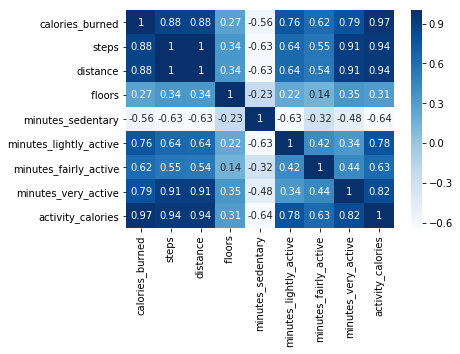

In [8]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)




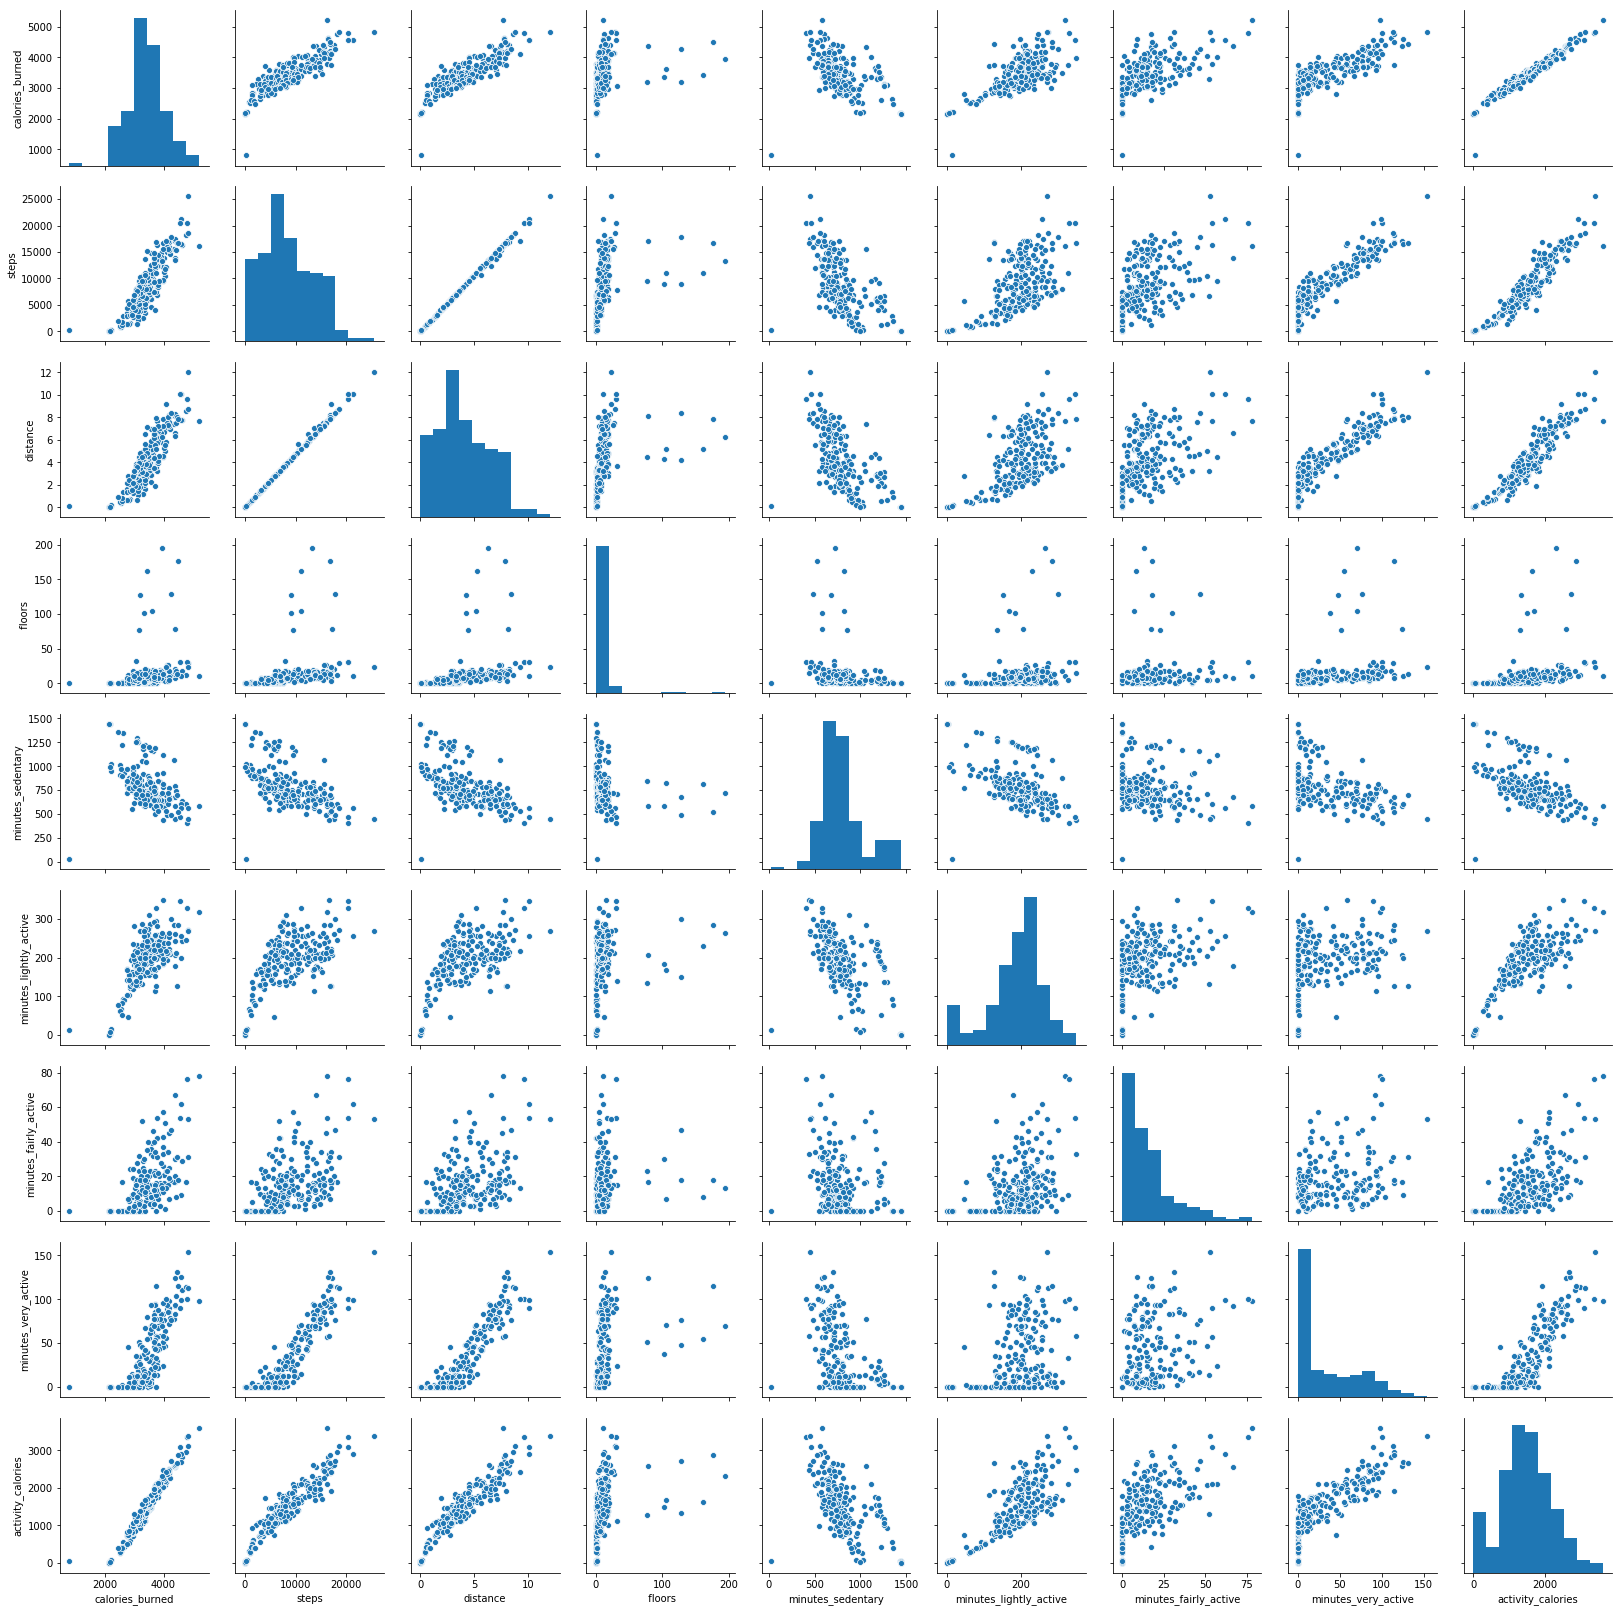

In [9]:
sns.pairplot(df)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df['date'] = pd.to_datetime(df.date)

In [ ]:
df.dtypes

In [ ]:
pd.to_numeric(df.calories_burned)

In [ ]:
with open('2018-04-26_through_2018-05-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
interestingrows

In [ ]:
df = pd.DataFrame(interestingrows)

In [ ]:
df.head()

In [ ]:
with open('2018-05-27_through_2018-06-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
interestingrows

In [ ]:
df1 = pd.DataFrame(interestingrows)

In [ ]:
df1

In [ ]:
with open('2018-06-27_through_2018-07-27.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df2 = pd.DataFrame(interestingrows)

In [ ]:
df2

In [ ]:
with open('2018-07-28_through_2018-08-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df3 = pd.DataFrame(interestingrows)

In [ ]:
df3

In [ ]:
with open('2018-08-27_through_2018-09-26.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df3 = pd.DataFrame(interestingrows)

In [ ]:
df3

In [ ]:
with open('2018-09-27_through_2018-10-27.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in range(1,33)]
    df = pd.DataFrame(interestingrows)

In [ ]:
df4 = pd.DataFrame(interestingrows)

In [ ]:
df4